## Extracting the intensity data for analysis in MTEX

In [488]:
import pathlib
import re

# from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.signal import medfilt

In [489]:
pwd

'D:\\Chris Daniel\\Continuous-Peak-Fit-Analysis'

### Extracting intensity data

Use the `read_fit_results` function to get the results from the .fit files.

In [490]:
def read_fit_results (experiment_number: int, start: int, end: int):
    """This function loops through refined '.fit' files produced using
    the python package Continuous-Peak-Fit and searches for the peak position, 
    intensity, half-width and Pseudo-Voigt weighting results. 
    
    :param experiment_number: input experiment number.
    :param start: first file number.
    :param end: last file number.
    
    :return: peak position, peak intensity, peak half-width and peak Pseudo-Voigt weighted fraction
    as nested dictionaries.
    """

    # define dictionaries to save results to
    peak_position = dict()
    peak_intensity = dict()
    peak_halfwidth = dict()
    peak_PV_weight = dict()
    
    for test_number in range (start,end+1):
        # input fit results file
        input_path = f"example-results/Diamond_2021/{experiment_number:05d}-cpf-output/{experiment_number:05d}_summed_{test_number:05d}.fit"

        # dictionary to save results to
        peak_position[test_number] = dict()
        peak_intensity[test_number] = dict()
        peak_halfwidth[test_number] = dict()
        peak_PV_weight[test_number] = dict()
        
        with open(input_path, 'r') as results_file:  
            line = results_file.readline()
            peak_number = 1
            
            while line:
                if '# peak number' in line:
                    peak_position[test_number][peak_number]=[]
                    peak_intensity[test_number][peak_number]=[]
                    peak_halfwidth[test_number][peak_number]=[]
                    peak_PV_weight[test_number][peak_number]=[]

                    for azimuth_degree in range (0, 360):
                        line = results_file.readline()
                        fit_result = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                        peak_position[test_number][peak_number].append(float(fit_result[0]))
                        peak_intensity[test_number][peak_number].append(float(fit_result[1]))
                        peak_halfwidth[test_number][peak_number].append(float(fit_result[2]))
                        peak_PV_weight[test_number][peak_number].append(float(fit_result[3]))

                    peak_number+=1

                else:
                    line = results_file.readline()

    return peak_position, peak_intensity, peak_halfwidth, peak_PV_weight

#### Extracting experiment data

In [491]:
experiment_number = 103840
start = 1
end = 1

peak_position, peak_intensity, peak_halfwidth, peak_PV_weight = read_fit_results(experiment_number,start,end)

In [492]:
peak_labels = ['10-10',
              '0002',
              '110',
              '10-11',
              '10-12',
              '200',
              '11-20',
              '10-13',
              #'211'
              '20-20',
              '11-22',
              '20-21',
              '0004',
              '220',
              '20-22',
              '10-14',
              '310',
              '20-23',
              '21-30',
              '21-31',
              #'222'
              '11-24',
              '21-32',
              '10-15',
              '20-24',
              #'321',
              '30-30',
              '30-31',
              #'21-33'
             ]

#### Extracting calibration powder data

In [ ]:
experiment_number = 103818
start = 1
end = 1

powder_peak_position, powder_peak_intensity, powder_peak_halfwidth, powder_peak_PV_weight = read_fit_results(experiment_number,start,end)

In [ ]:
powder_peak_labels = ['10-10',
              '0002',
              #'110',
              '10-11',
              '10-12',
              #'200',
              '11-20',
              '10-13',
              #'211'
              '20-20',
              '11-22',
              '20-21',
              '0004',
              #'220',
              '20-22',
              '10-14',
              #'310',
              '20-23',
              '21-30',
              '21-31',
              #'222'
              '11-24',
              '21-32',
              '10-15',
              '20-24',
              #'321',
              '30-30',
              '30-31',
              #'21-33'
             ]

### Writing intensity data to file

In [425]:
def peak_data_to_text_file(experiment_number: int, peak_intensity: dict, peak_labels: list, orientation: str, 
                           data_resolution: int):
    """This function ...
    """
    
    sample_to_plane = {'S1': 'YZ', 'S2': 'XZ', 'S3': 'XY', 'S4': 'YX to YZ', 'S5': 'XY to XZ', 'S6': 'XZ to YZ'}
    plane = sample_to_plane[orientation]
    
    for count, label in enumerate(peak_labels):
        output_path = f'example-results/Diamond_2021/{experiment_number:05d}-intensities/{experiment_number:05d}_peak_intensity_{label}.txt'
        output_folder = pathlib.Path(output_path).parent
        output_folder.mkdir(exist_ok=True)

        with open(output_path, 'w') as output_file:

            # write metadata for the top of the file
            output_file.write('Polar Angle \t Azimuth Angle \t Intensity \n')
            
            # iterate through the peak intensities
            for i in range(0, len(peak_intensity[1][1])):
                
                # set the angle around the circle (diffraction pattern ring) from horizontal position
                alpha = i*data_resolution
                
                # set the inclination of any inclined planes to 45 degrees
                beta = (np.pi)/4

                # use the circle parametrisation formula to calculate x,y,z values
                if plane == 'XY':
                    x = np.cos(np.deg2rad(alpha))
                    y = np.sin(np.deg2rad(alpha))
                    z = 0

                if plane == 'XZ':
                    x = np.cos(np.deg2rad(alpha))
                    y = 0
                    z = np.sin(np.deg2rad(alpha))

                if plane == 'YZ':
                    x = 0
                    y = np.cos(np.deg2rad(alpha))
                    z = np.sin(np.deg2rad(alpha))

                if plane == 'XY to XZ':
                    x = np.cos(np.deg2rad(alpha))
                    y = np.sin(np.deg2rad(alpha))*np.cos(beta)
                    z = np.sin(np.deg2rad(alpha))*np.sin(beta)

                if plane == 'YX to YZ':
                    x = np.sin(np.deg2rad(alpha))*np.cos(beta)
                    y = np.cos(np.deg2rad(alpha))
                    z = np.sin(np.deg2rad(alpha))*np.sin(beta)

                if plane == 'XZ to YZ':
                    x = np.cos(np.deg2rad(alpha))*np.cos(beta)
                    y = np.cos(np.deg2rad(alpha))*np.sin(beta)
                    z = np.sin(np.deg2rad(alpha))

                # calulate the spherical polar coordinates from cartesian coordinates using the standard equations
                theta = np.rad2deg(np.arccos(z))
                # arctan2 needed to handle negative values for phi values
                phi = np.rad2deg(np.arctan2(y,x))
                # convert phi scale from -180, 180 to 0, 360
                if phi < 0:
                    phi = phi + 360
                
                output_file.write(f'{theta}\t'
                                  f'{phi}\t'
                                  f'{peak_intensity[1][count+1][i]}\n')
                
        print(f"Written .txt data file to: '{output_path}'.")

In [427]:
# sample orientation from options S1, S2, S3, S4, S5, S6
orientation = 'S6'
# data resolution in degrees
data_resolution = 1

peak_data_to_text_file(experiment_number, peak_intensity, peak_labels, orientation, data_resolution)

Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_10-10.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_0002.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_110.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_10-11.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_10-12.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_200.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_11-20.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_10-13.txt'.
Written .txt data file to: 'example-results/Diamond_2021/103840-intensities/103840_peak_intensity_20-20.txt'.
Written .txt da

### Notes on parameterising a circle in 3D and converting to spherical polar coordinates

In [396]:
planes = 'XY', 'XZ', 'YZ', 'XY to XZ', 'YX to YZ', 'XZ to YZ'

x_values={}
y_values={}
z_values={}

polar={}
azimuth={}

resolution = 1
number_iterations = int((359 / resolution) + 1)

for plane in planes:
    x_values[plane]=[]
    y_values[plane]=[]
    z_values[plane]=[]
    polar[plane]=[]
    azimuth[plane]=[]
    
    # draw the circle from 0 to 360 degrees
    for alpha in np.linspace(0,359,number_iterations):
        
        # set the inclination of any inclined planes to 45 degrees
        beta = (np.pi)/4
        
        # use the circle parametrisation formula to calculate x,y,z values
        if plane == 'XY':
            x = np.cos(np.deg2rad(alpha))
            y = np.sin(np.deg2rad(alpha))
            z = 0

        if plane == 'XZ':
            x = np.cos(np.deg2rad(alpha))
            y = 0
            z = np.sin(np.deg2rad(alpha))

        if plane == 'YZ':
            x = 0
            y = np.cos(np.deg2rad(alpha))
            z = np.sin(np.deg2rad(alpha))
            
        if plane == 'XY to XZ':
            x = np.cos(np.deg2rad(alpha))
            y = np.sin(np.deg2rad(alpha))*np.cos(beta)
            z = np.sin(np.deg2rad(alpha))*np.sin(beta)

        if plane == 'YX to YZ':
            x = np.sin(np.deg2rad(alpha))*np.cos(beta)
            y = np.cos(np.deg2rad(alpha))
            z = np.sin(np.deg2rad(alpha))*np.sin(beta)

        if plane == 'XZ to YZ':
            x = np.cos(np.deg2rad(alpha))*np.cos(beta)
            y = np.cos(np.deg2rad(alpha))*np.sin(beta)
            z = np.sin(np.deg2rad(alpha))
        
        # calulate the spherical polar coordinates from cartesian coordinates using the standard equations
        theta = np.rad2deg(np.arccos(z))
        # arctan2 needed to handle negative values for phi values
        phi = np.rad2deg(np.arctan2(y,x))
        # convert phi scale from -180, 180 to 0, 360
        if phi < 0:
            phi = phi + 360

        # store the data in dictionaries
        x_values[plane].append(x)
        y_values[plane].append(y)
        z_values[plane].append(z)
        polar[plane].append(theta)
        azimuth[plane].append(phi)

Note, the `XZ` and `XZ to YZ` circles do not seem to render correctly on the plot. But, if you check the values you will see they are orientated correctly.

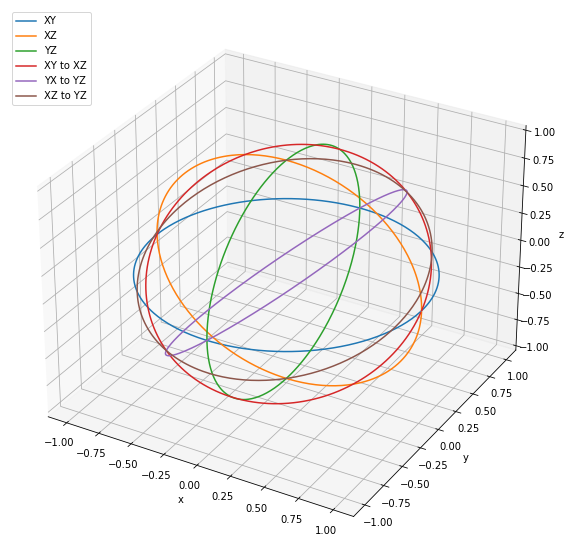

In [397]:
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
for plane in planes:
    ax.plot3D(x_values[plane], y_values[plane], z_values[plane], label=plane)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend(loc ='upper left')

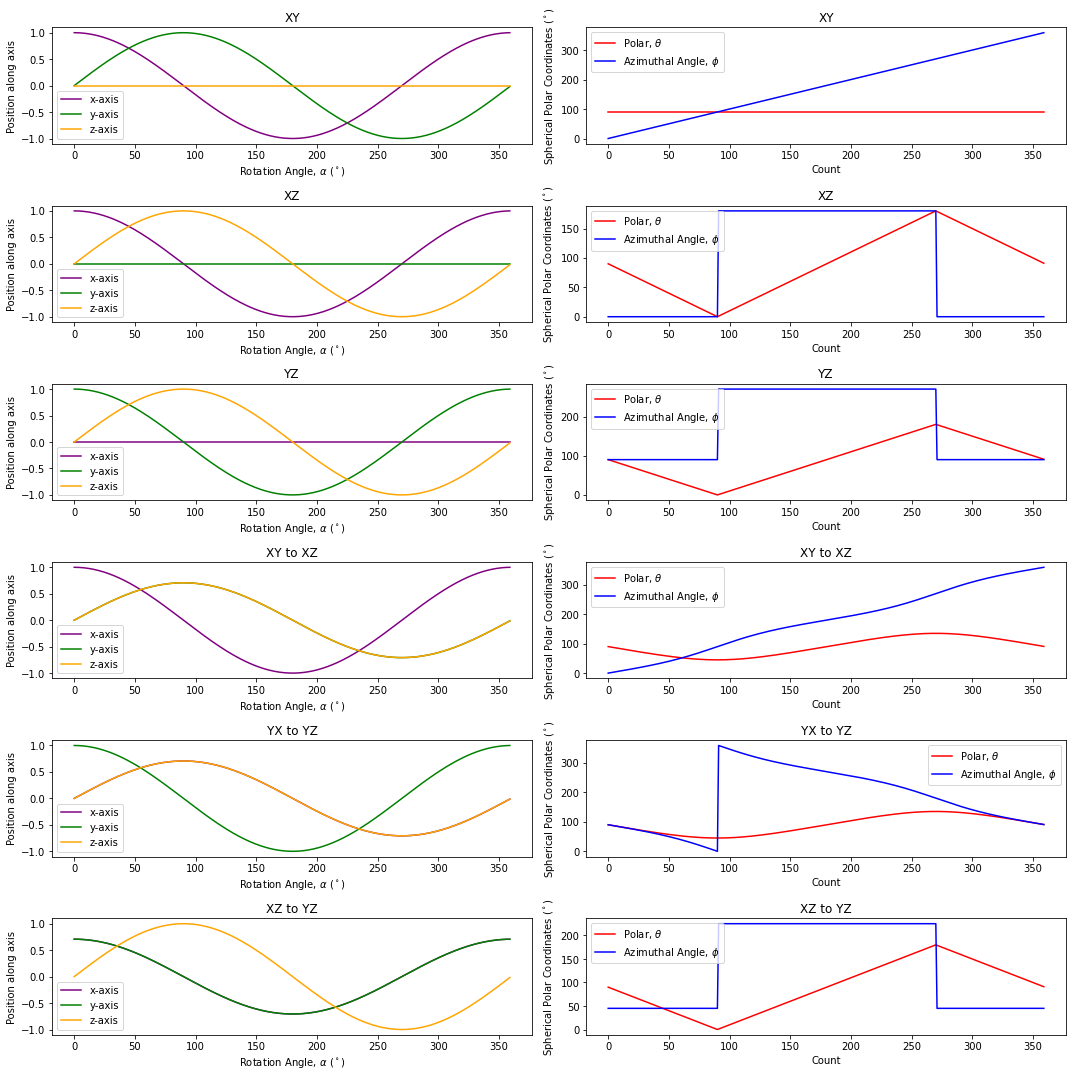

In [398]:
count=1
plt.subplots(figsize=(15, 15))

for plane in planes:    
    plt.subplot(6,2,count)
    plt.plot(x_values[plane], color = 'purple', label = r'x-axis')
    plt.plot(y_values[plane], color = 'green', label = r'y-axis')
    plt.plot(z_values[plane], color = 'orange', label = r'z-axis')
    plt.xlabel(r'Rotation Angle, ${\alpha}$ (${^\circ}$)')
    plt.ylabel(r'Position along axis')
    plt.title(plane)
    plt.legend()
    plt.tight_layout()
    count+=1
                
    plt.subplot(6,2,count)
    plt.plot(polar[plane], color = 'red', label = r'Polar, ${\theta}$')
    plt.plot(azimuth[plane], color ='blue', label = r'Azimuthal Angle, ${\phi}$')
    plt.title(plane)
    plt.xlabel(r'Count')
    plt.ylabel(r'Spherical Polar Coordinates (${^\circ}$)')
    plt.legend()
    plt.tight_layout()       
    count+=1            
                
plt.show()

### Combine intensities from different samples

In [486]:
def combine_files (experiment_numbers: list, peak_labels: list):
    """This function... 
    """
    
    start = experiment_numbers[0]
    end = experiment_numbers[-1]

    for label in peak_label:
        output_path = f"example-results/Diamond_2021/{start}-to-{end}-combined-intensities/combined_peak_intensity_{label}.txt"
        output_folder = pathlib.Path(output_path).parent
        output_folder.mkdir(exist_ok=True)
        # overwrite any existing output file
        
        with open(output_path, 'w') as output_file:
            # write metadata for the top of the file
            output_file.write('Polar Angle \t Azimuth Angle \t Intensity \n')
        
        for experiment_number in experiment_numbers:
            input_path = f"example-results/Diamond_2021/{experiment_number:05d}-intensities/{experiment_number:05d}_peak_intensity_{label}.txt"
       
            # open output file in append mode to add lines
            with open(output_path, 'a') as output_file:
                
                with open(input_path, 'r') as results_file:  
                    line = results_file.readline()
                    line = results_file.readline()
                    
                    while line:
                        output_file.write(line)
                        line = results_file.readline()

                    print(f"Written data from: '...{input_path[47:]}' to: '...{output_path[66:]}'.")    

In [487]:
experiment_numbers = list(range(103840,103846))

combine_files(experiment_numbers, peak_labels)

Written data from: '.../103840_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103841_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103842_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103843_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103844_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103845_peak_intensity_10-10.txt' to: '.../combined_peak_intensity_10-10.txt'.
Written data from: '.../103840_peak_intensity_0002.txt' to: '.../combined_peak_intensity_0002.txt'.
Written data from: '.../103841_peak_intensity_0002.txt' to: '.../combined_peak_intensity_0002.txt'.
Written data from: '.../103842_peak_intensity_0002.txt' to: '.../combined_peak_intensity_0002.txt'.
Written data from: '.../103843_peak_intensity_0002.txt' to: '.../combined_peak_intensity

Written data from: '.../103840_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103841_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103842_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103843_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103844_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103845_peak_intensity_10-15.txt' to: '.../combined_peak_intensity_10-15.txt'.
Written data from: '.../103840_peak_intensity_20-24.txt' to: '.../combined_peak_intensity_20-24.txt'.
Written data from: '.../103841_peak_intensity_20-24.txt' to: '.../combined_peak_intensity_20-24.txt'.
Written data from: '.../103842_peak_intensity_20-24.txt' to: '.../combined_peak_intensity_20-24.txt'.
Written data from: '.../103843_peak_intensity_20-24.txt' to: '.../combined_peak_in